In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from matplotlib.pylab import rcParams
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.mlab as mlab
from scipy import stats 
rcParams['figure.figsize'] = 10, 5

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data=pd.read_csv('rates_query.csv',parse_dates=['Week'],index_col=0,date_parser=dateparse)

len(data)

657

In [3]:
data[0:1]

,rates,acetaminophen,aching muscles,blocked nose,cold flu,cold remedy,cold remedies,common cold,the common cold,common cold cure,...,antipyretics,ear thermometer,earache,fatigue,feverish,high fever,respirator,stuffy nose,thermometer,upper respiratory infection
Week,,,,,,,,,,,,,,,,,,,,,
2004-01-04,152.13,39,39,88,44,0,0,47,0,0,...,0,0,60,70,0,0,41,0,65,0


In [4]:
data.columns

Index(['rates', 'acetaminophen', 'aching muscles', 'blocked nose', 'cold flu',
       'cold remedy', 'cold remedies', 'common cold', 'the common cold',
       'common cold cure', 'common cold symptoms', 'common cold virus',
       'common cold nhs', 'cough', 'cough syrup', 'fever', 'headache',
       'high temperature', 'hoarse voice', 'ibuprofen', 'loss of smell',
       'loss of taste', 'loss of taste and smell', 'muscle pain',
       'nasalcongestion', 'paracetamol', 'runny nose', 'sneezing',
       'sore throat', 'post nasal drip', 'coughing', 'nasal passages',
       'antipyretics', 'ear thermometer', 'earache', 'fatigue', 'feverish',
       'high fever', 'respirator', 'stuffy nose', 'thermometer',
       'upper respiratory infection'],
      dtype='object')

In [5]:
train, valid = data[0:470], data[470:522]
L=data.index[470:522]
L

DatetimeIndex(['2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27',
               '2013-02-03', '2013-02-10', '2013-02-17', '2013-02-24',
               '2013-03-03', '2013-03-10', '2013-03-17', '2013-03-24',
               '2013-03-31', '2013-04-07', '2013-04-14', '2013-04-21',
               '2013-04-28', '2013-05-05', '2013-05-12', '2013-05-19',
               '2013-05-26', '2013-06-02', '2013-06-09', '2013-06-16',
               '2013-06-23', '2013-06-30', '2013-07-07', '2013-07-14',
               '2013-07-21', '2013-07-28', '2013-08-04', '2013-08-11',
               '2013-08-18', '2013-08-25', '2013-09-01', '2013-09-08',
               '2013-09-15', '2013-09-22', '2013-09-29', '2013-10-06',
               '2013-10-13', '2013-10-20', '2013-10-27', '2013-11-03',
               '2013-11-10', '2013-11-17', '2013-11-24', '2013-12-01',
               '2013-12-08', '2013-12-15', '2013-12-22', '2013-12-29'],
              dtype='datetime64[ns]', name='Week', freq=None)

In [17]:
features=['acetaminophen', 
          'aching muscles', 
          'blocked nose',
          'cold flu', 
          'cold remedy',
          'cold remedies', 
          'common cold',
          'the common cold', 
          'common cold cure',
          'common cold symptoms',
          'common cold virus', 
          'common cold nhs',
          'cough',
          'cough syrup', 
          'fever',
          'headache', 
          'high temperature', 
          'hoarse voice', 
          'ibuprofen',
          'loss of smell', 
          'loss of taste',
          'loss of taste and smell',
          'muscle pain',
          'nasalcongestion',
          'paracetamol',
          'runny nose',
          'sneezing', 
          'sore throat',
          'post nasal drip', 
          'coughing',
          'nasal passages',
          'antipyretics',
          'ear thermometer', 
          'earache', 
          'fatigue',
          'feverish',
          'high fever',
          'respirator',
          'stuffy nose',
          'thermometer',
          'upper respiratory infection'
         ]

x_train = train[features]
y_train = train['rates'].values


x_valid = valid[features]
y_valid = valid['rates'].values

In [1]:
#train.corr(method='pearson')

### Least Square

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
lr.fit(x_train, y_train)
y_pred2 = lr.fit(x_train, y_train).predict(x_valid)

lr picked 41 variables and eliminated the other 0 variables


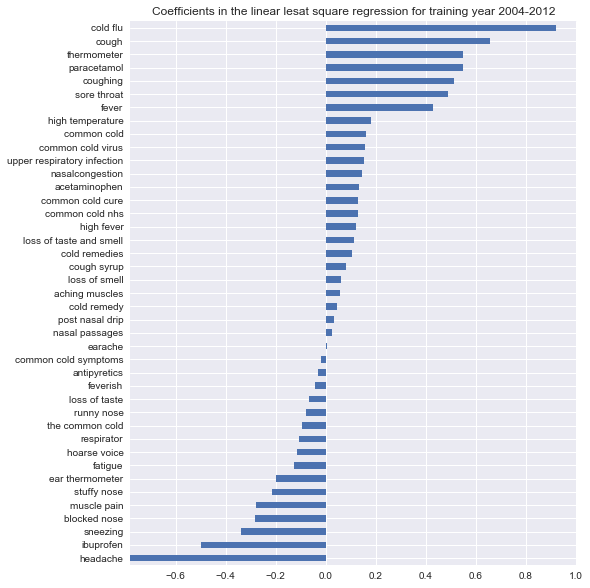

In [16]:
coef = pd.Series(lr.coef_, index = x_train.columns)
#imp_coef = pd.concat([coef.sort_values().head(10),
                     #coef.sort_values().tail(10)])
print("lr picked " + str(sum(coef != 0)) + " variables and eliminated the other " + 
      str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the linear lesat square regression for training year 2004-2012")

### Elastic Net

In [12]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=1.0, l1_ratio=0.7,fit_intercept=True,max_iter=10000,tol=0.0001,normalize=False)
enet.fit(x_train, y_train)
y_pred = enet.fit(x_train, y_train).predict(x_valid)

In [10]:
y2013 = pd.DataFrame(y_pred, columns = ['predicted rate'])
y2013.to_csv('y2013.csv')

### Grid Search

In [11]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

#parameters = {'alpha': np.arange (0.01,100,0.01),'l1_ratio':[0.5]}
parameters = {'alpha': [1],'l1_ratio':[0.7] }

#parameters = {'alpha': np.arange (0.01,100,0.01),'l1_ratio':[0.5]}

clf = GridSearchCV(ElasticNet(fit_intercept=True,max_iter=10000,tol=0.000001,precompute=False,normalize=False),
                   parameters,scoring='neg_mean_squared_error',cv=10)

clf.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=1e-06, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1], 'l1_ratio': [0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [12]:
y_pred = clf.predict(x_valid)

In [13]:
clf.best_params_

{'alpha': 1, 'l1_ratio': 0.7}

### Correlation

In [53]:
np.corrcoef(y_pred, y_valid)

array([[ 1.        ,  0.93467737],
       [ 0.93467737,  1.        ]])

In [54]:
np.corrcoef(y_pred2, y_valid)

array([[ 1.        ,  0.88921321],
       [ 0.88921321,  1.        ]])

### RMSE

In [55]:
print('Elastic Net RMSE: %.4f'% np.sqrt(sum((y_pred-y_valid)**2)/len(valid)))

Elastic Net RMSE: 14.6615


In [13]:
print('Elastic Net RMSE: %.4f'% np.sqrt(sum((y_pred-y_valid)**2)/len(valid)))

Elastic Net RMSE: 14.2589


In [56]:
print('Least Square RMSE: %.4f'% np.sqrt(sum((y_pred2-y_valid)**2)/len(valid)))

Least Square RMSE: 23.0276


### MAE

In [57]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_valid, y_pred)

12.281598076677627

In [58]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_valid, y_pred2)

19.196221146578974

### MAPE

In [59]:
def mean_absolute_percentage_error(y_valid, y_pred): 
    y_valid, y_pred = np.array(y_valid), np.array(y_pred)
    return np.mean(np.abs((y_valid - y_pred) / y_valid)) * 100

In [60]:
mean_absolute_percentage_error(y_valid, y_pred)

14.792334478599086

In [61]:
mean_absolute_percentage_error(y_valid, y_pred2)

23.356737762332607

### Plot weights

Elastic Net picked 40 variables and eliminated the other 1 variables


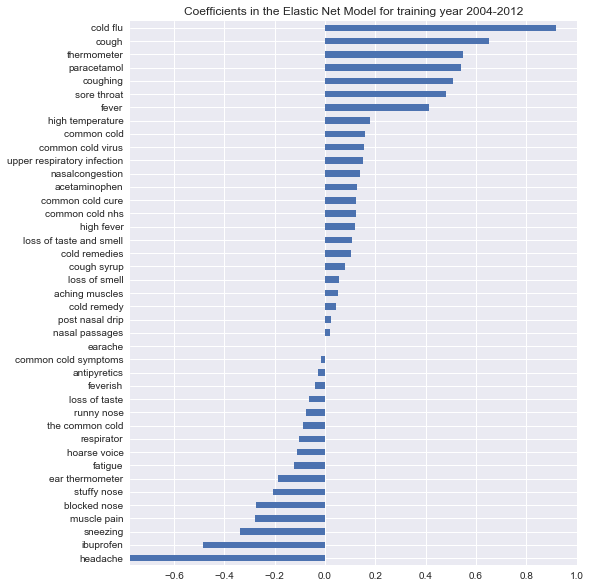

In [14]:
coef = pd.Series(enet.coef_, index = x_train.columns)
#imp_coef = pd.concat([coef.sort_values().head(10),
                     #coef.sort_values().tail(10)])
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " + 
      str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model for training year 2004-2012")

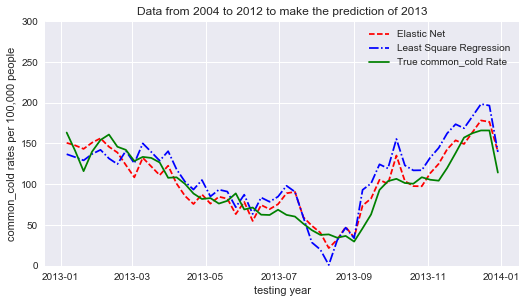

In [63]:
L=data.index[470:522]
df = pd.DataFrame(data=y_pred, index=L,columns=["predicted rate"])
df1 = pd.DataFrame(data=y_valid, index=L,columns=["rates"])
df2 = pd.DataFrame(data=y_pred2, index=L,columns=["predicted rate"])
plt.figure(figsize=(8.5,4.5))

line_up, = plt.plot(df, label='Elastic Net',ls='dashed',c='red')
line_middle,=plt.plot(df2, label='Least Square Regression',ls='dashdot',c='blue')
line_down, = plt.plot(df1, label='True common_cold Rate',ls='solid',c='green')
plt.legend(handles=[line_up,line_middle, line_down])

#plt.title('Data from 2004 to 2009 to make the prediction of 2010, RMSE: %.4f'% np.sqrt(sum((y_pred-y_valid)**2)/len(valid)))
plt.title('Data from 2004 to 2012 to make the prediction of 2013')
plt.ylabel('common_cold rates per 100,000 people')
plt.xlabel('testing year')
plt.ylim((0, 300))

pyplot.show()